In [1]:
import torch
from torch.utils.data import DataLoader
from pprint import pprint
import matplotlib.pyplot as plt

from EIANN import Network
import EIANN.utils as ut
import EIANN.plot as pt

pt.update_plot_defaults()

In [2]:
input_size = 21
dataset = torch.eye(input_size) #each row is a different pattern
target = torch.eye(dataset.shape[0])

data_seed = 0
data_generator = torch.Generator()
sample_indexes = torch.arange(len(dataset))
dataloader = DataLoader(list(zip(sample_indexes, dataset, target)), 
                        shuffle=True, 
                        generator=data_generator)

test_dataloader = DataLoader(list(zip(sample_indexes, dataset, target)), 
                             batch_size = 21)
epochs=100
seed=42

### BTSP learning rule

In [3]:
# network_config = ut.read_from_yaml('../optimize/data/20200830_EIANN_1_hidden_BTSP_config_A.yaml')
network_config = ut.read_from_yaml('../config/EIANN_1_hidden_BTSP_config_A.yaml')
layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

btsp_network = Network(layer_config, projection_config, seed=seed, **training_kwargs)

Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

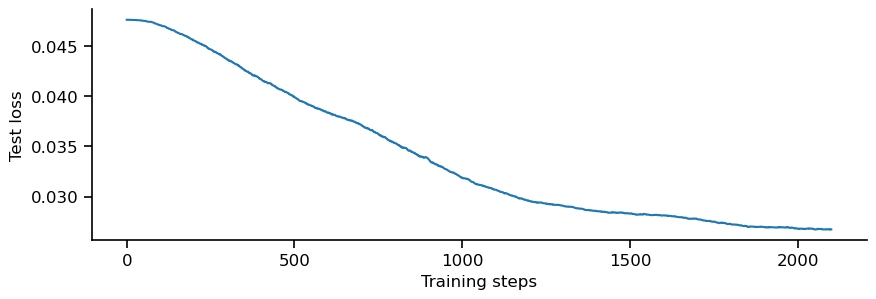

In [4]:
data_generator.manual_seed(data_seed)
btsp_network.train(dataloader, epochs, store_history=True, store_weights=True, status_bar=True)

pt.plot_test_loss_history(btsp_network, test_dataloader)

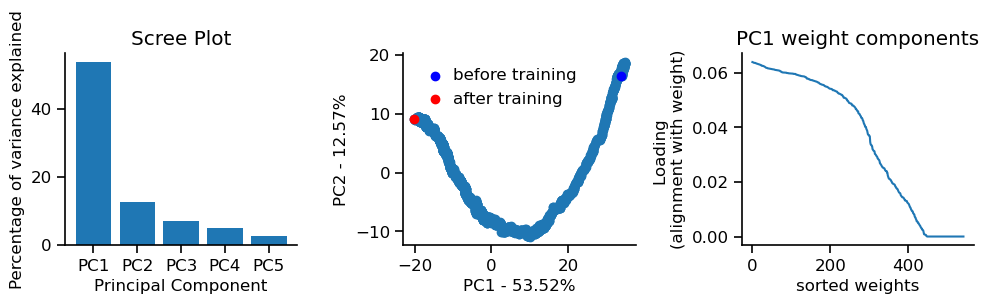

In [5]:
flat_param_history_btsp,_ = pt.get_flat_param_history(btsp_network.param_history)
pt.plot_param_history_PCs(flat_param_history_btsp)

  0%|          | 0/400 [00:00<?, ?it/s]

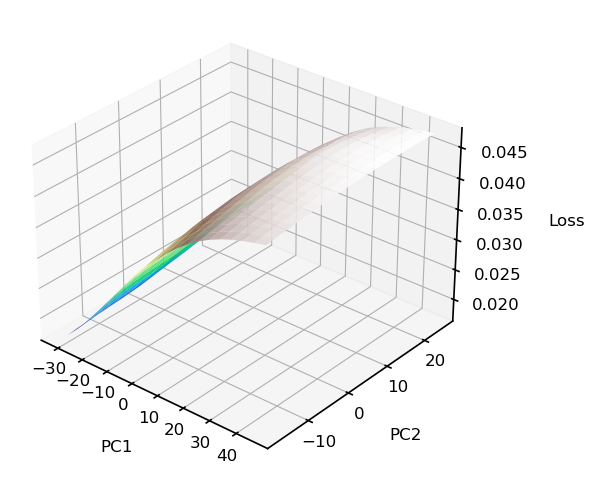

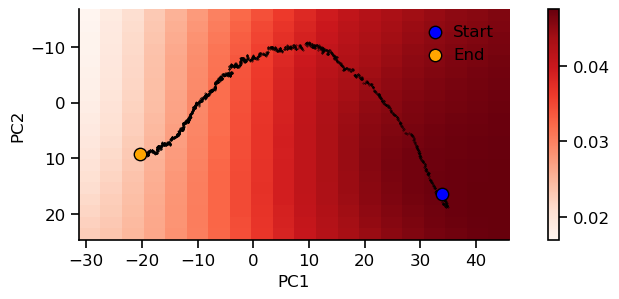

In [6]:
pt.plot_loss_landscape(test_dataloader, btsp_network, num_points=20)

In [7]:
dParam_history = ut.get_update_history(btsp_network)

for dW in dParam_history['module_dict.OutputE_H1E.weight']:
    for post_unit_updates in dW:
        if not (torch.all(post_unit_updates>=0) or torch.all(post_unit_updates<=0)):
            print(post_unit_updates)
            break

tensor([ 6.1108e-02,  5.7822e-02,  3.1522e-04,  1.4850e-04, -9.5665e-06,
         8.2441e-05,  7.0930e-06])
tensor([ 1.8192e-02, -2.8382e-04,  2.9692e-02,  1.6548e-02, -1.1036e-04,
         3.9045e-05,  0.0000e+00])
tensor([ 4.5042e-05, -7.7039e-06,  2.5523e-04,  5.6739e-02,  1.2458e-04,
         0.0000e+00,  3.3176e-05])
tensor([ 5.9141e-02, -1.4079e-04,  6.1079e-02,  2.9555e-02, -2.8908e-05,
         0.0000e+00,  0.0000e+00])
tensor([ 4.5024e-05,  5.6722e-02,  2.5460e-04, -2.1100e-05,  1.2439e-04,
         5.8856e-02,  3.3168e-05])
tensor([ 0.0002,  0.0120,  0.0205, -0.0002,  0.0351,  0.0000,  0.0000])
tensor([ 1.9665e-04,  4.3070e-02,  1.2895e-02, -2.8653e-04, -4.1738e-05,
         3.0585e-05,  9.9838e-06])
tensor([ 5.8685e-02, -2.4019e-04,  6.0544e-02,  5.0300e-02, -3.5629e-05,
         0.0000e+00,  0.0000e+00])
tensor([ 0.0000e+00,  4.3511e-06, -5.0902e-05,  7.4774e-05,  1.0289e-05,
         2.5642e-04,  1.5973e-04])
tensor([ 1.9625e-04,  1.6023e-02, -4.5523e-05,  3.1098e-02,  1.2

tensor([ 0.0104, -0.0019,  0.0000,  0.0000,  0.0000,  0.0000, -0.0027])
tensor([ 0.0150, -0.0013, -0.0022, -0.0016,  0.0000, -0.0017, -0.0013])
tensor([ 3.2651e-04, -1.5306e-03,  0.0000e+00, -2.0970e-03,  1.9482e-03,
        -1.8827e-03, -2.7351e-05])
tensor([ 0.0000, -0.0008, -0.0016, -0.0007,  0.0356,  0.0000, -0.0008])
tensor([ 0.0000,  0.0000,  0.0000, -0.0012,  0.0279, -0.0003, -0.0016])
tensor([-0.0001,  0.0316,  0.0000,  0.0000,  0.0000, -0.0006, -0.0008])
tensor([ 0.0000, -0.0019, -0.0018,  0.0000,  0.0092, -0.0022, -0.0018])
tensor([ 0.0000, -0.0004,  0.0182, -0.0002,  0.0000,  0.0000,  0.0000])
tensor([ 0.0000, -0.0040,  0.0369,  0.0000, -0.0003,  0.0000,  0.0000])
tensor([-2.5749e-05,  1.0278e-03,  0.0000e+00,  0.0000e+00, -1.6551e-03,
         0.0000e+00,  4.1772e-02])
tensor([ 0.0000, -0.0004,  0.0176, -0.0002,  0.0000,  0.0000,  0.0000])
tensor([-0.0015,  0.0003,  0.0412, -0.0004,  0.0000,  0.0000, -0.0035])
tensor([ 0.0000,  0.0000, -0.0010,  0.0000, -0.0009,  0.0000,  0

/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:106: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:145: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:177: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


population biases:
H1 E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI Parameter containing:
tensor([0.])
H1 Dend_I Parameter containing:
tensor([0.])
Output E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI Parameter containing:
tensor([0.])


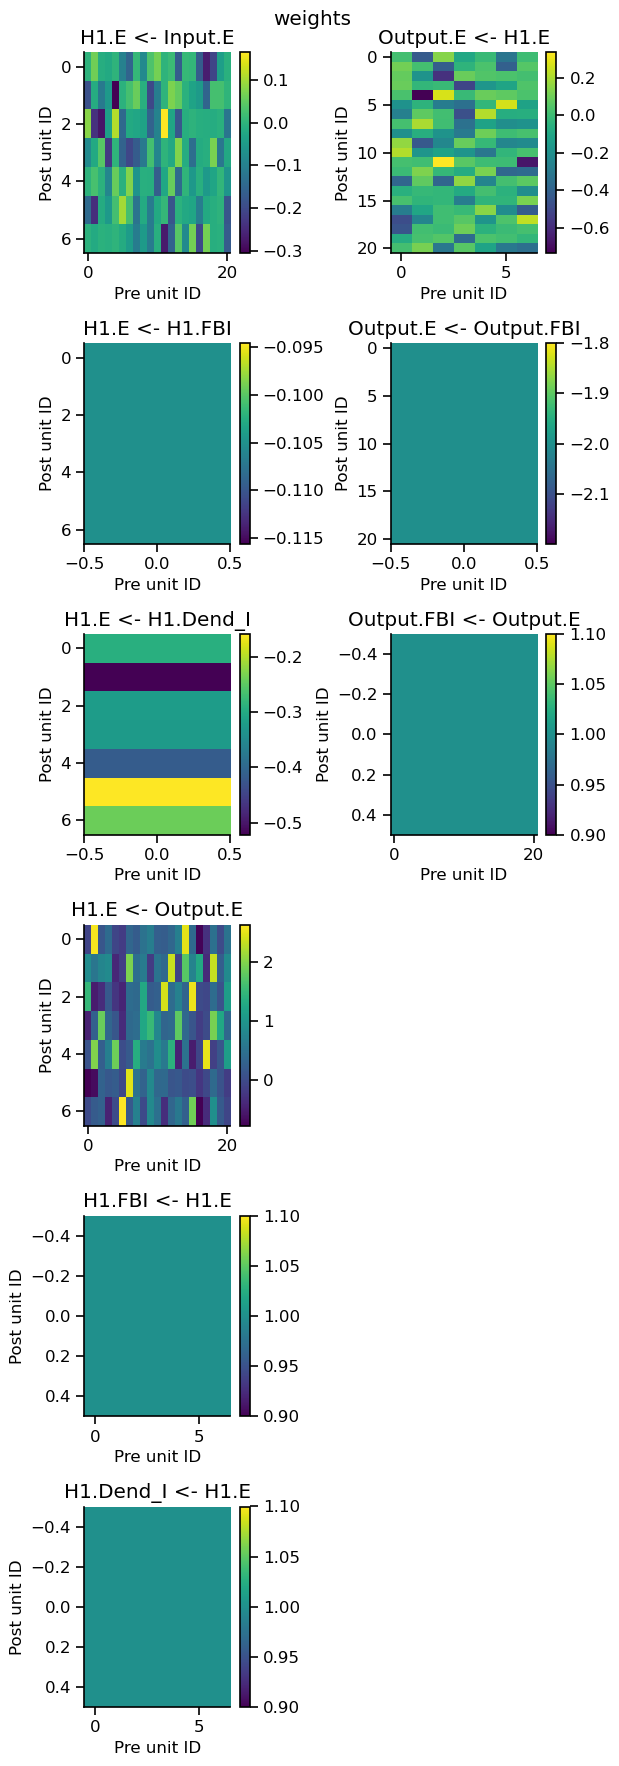

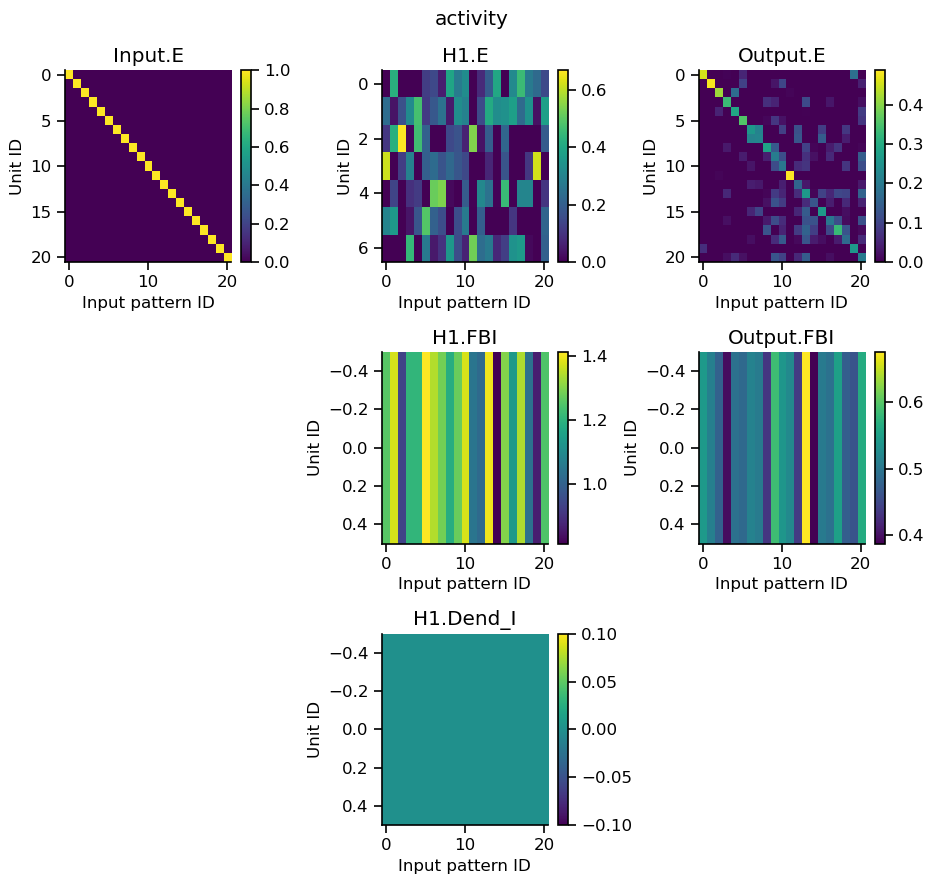

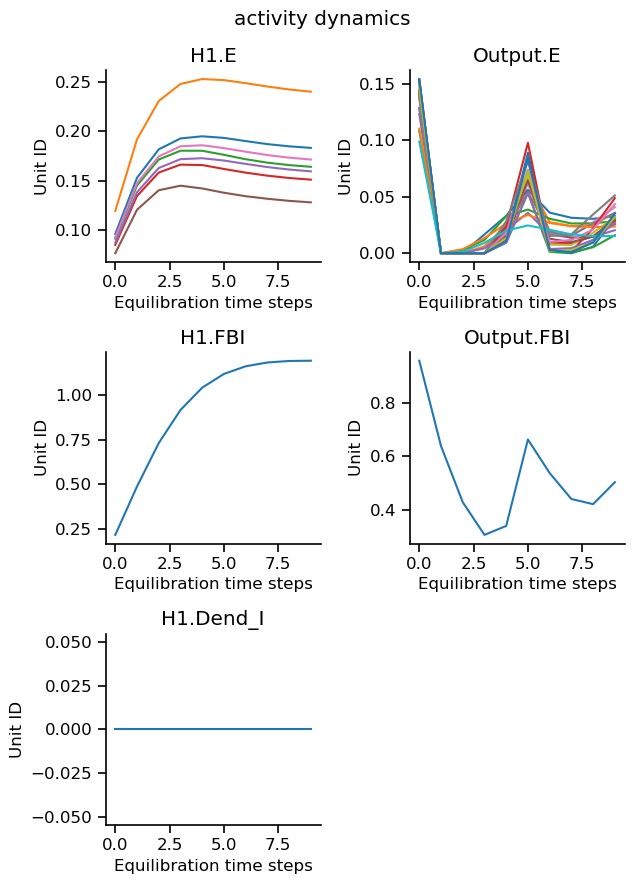

In [8]:
pt.plot_simple_EIANN_config_summary(btsp_network, len(dataset))

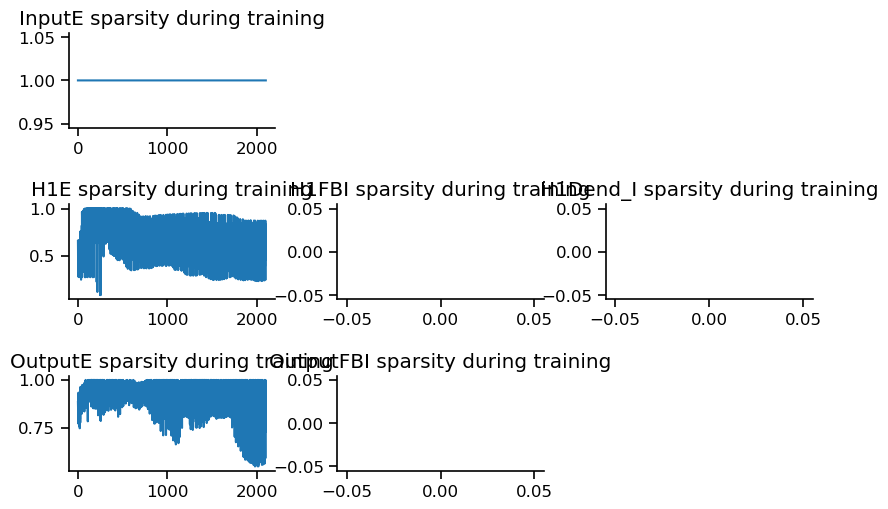

In [21]:
ut.compute_sparsity_history(btsp_network)
pt.plot_sparsity_history(btsp_network)

### Backprop (softplus; SGD)

In [9]:
network_config = ut.read_from_yaml('../config/EIANN_1_hidden_backprop_1_inh_softplus_SGD_config_B.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

bp_network = Network(layer_config, projection_config, seed=seed, **training_kwargs)

In [10]:
# Initialize backprop net with same weights as BTSP init
btsp_initial_state = btsp_network.param_history[0]
btsp_initial_state = {key: btsp_initial_state[key] for key in bp_network.state_dict()}
bp_network.load_state_dict(btsp_initial_state)

<All keys matched successfully>

Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

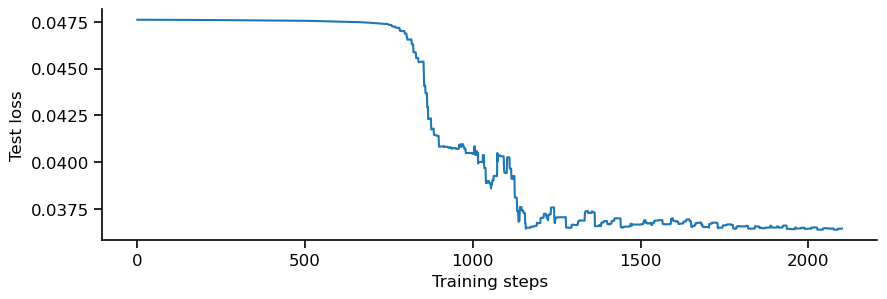

In [11]:
data_generator.manual_seed(data_seed)
bp_network.train(dataloader, epochs, store_history=True, store_weights=True, status_bar=True)

for layer in bp_network: #swap to ReLU activation to make loss comparable across networks
    for population in layer:
        population.activation = torch.nn.ReLU()
        
pt.plot_test_loss_history(bp_network, test_dataloader)

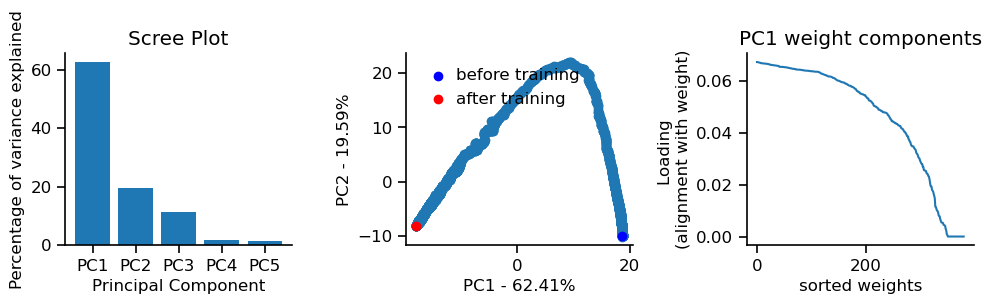

In [12]:
flat_param_history_bp,_ = pt.get_flat_param_history(bp_network.param_history)
pt.plot_param_history_PCs(flat_param_history_bp)

  0%|          | 0/400 [00:00<?, ?it/s]

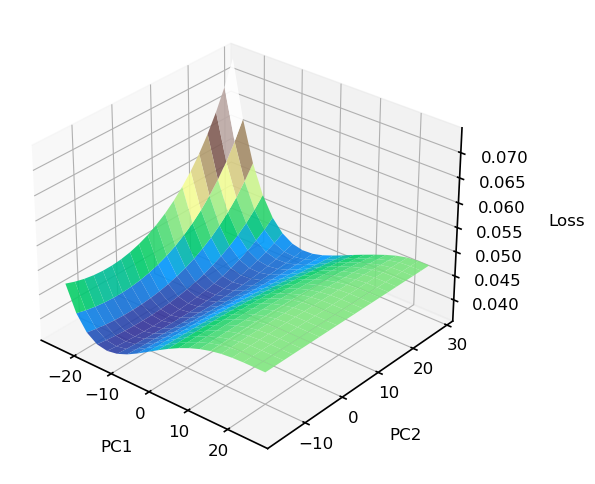

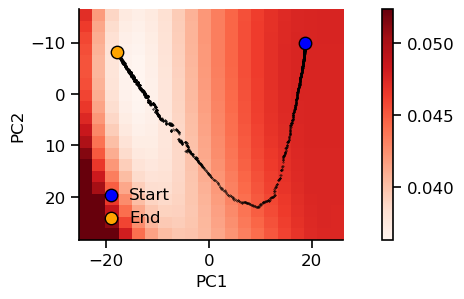

In [13]:
pt.plot_loss_landscape(test_dataloader, bp_network, num_points=20)

In [14]:
dParam_history = ut.get_update_history(bp_network)

for dW in dParam_history['module_dict.OutputE_H1E.weight']:
    for post_unit_updates in dW:
        if not (torch.all(post_unit_updates>=0) or torch.all(post_unit_updates<=0)):
            print(post_unit_updates)
            break

tensor([-9.0525e-07,  2.5850e-03,  1.8560e-01, -1.4678e-06,  5.9936e-05,
         5.0672e-06,  1.2140e-02])
tensor([ 4.2907e-15, -1.3497e-03, -5.4801e-04,  6.4835e-04, -1.3031e-03,
         5.0978e-06,  5.9866e-07])
tensor([-7.2643e-08,  4.4536e-03,  2.7224e-01, -8.0466e-07, -2.7940e-09,
         0.0000e+00, -6.6341e-04])
tensor([-3.2389e-04,  0.0000e+00,  5.7472e-11,  0.0000e+00,  0.0000e+00,
         0.0000e+00, -8.5787e-02])
tensor([ 5.2381e-04,  0.0000e+00,  4.7692e-02, -2.9057e-07,  0.0000e+00,
         1.7403e-01,  0.0000e+00])
tensor([ 7.1842e-05,  0.0000e+00,  8.0186e-02, -1.1176e-08,  0.0000e+00,
         2.2605e-01,  0.0000e+00])
tensor([ 5.7146e-06,  0.0000e+00, -4.3710e-02,  3.7253e-09,  0.0000e+00,
        -2.0027e-04,  3.4580e-06])
tensor([ 2.3283e-10, -4.4258e-02, -1.6363e-04, -1.2975e-02, -9.0199e-02,
        -5.9605e-07, -2.0862e-06])
tensor([ 1.1642e-10,  3.5288e-15,  3.5531e-11,  0.0000e+00, -3.9556e-02,
        -2.5769e-02, -4.9749e-02])
tensor([-6.9849e-10,  0.0000

tensor([ 0.0000e+00,  0.0000e+00, -1.5672e-03,  0.0000e+00,  1.3478e-11,
        -6.0130e-03,  0.0000e+00])
tensor([-1.4296e-01,  4.6222e-13,  1.5876e-13, -7.8135e-02,  6.2998e-13,
         1.2080e-10, -8.3797e-02])
tensor([ 1.2523e-15,  0.0000e+00,  0.0000e+00,  1.5701e-17, -1.6036e-02,
        -6.7388e-03, -1.4774e-02])
tensor([ 2.5061e-15, -8.7933e-02, -9.7752e-05, -1.3632e-03, -5.1174e-02,
         1.5217e-10,  0.0000e+00])
tensor([ 0.0000e+00,  0.0000e+00, -4.4501e-03,  0.0000e+00,  1.1580e-12,
        -2.0802e-02,  0.0000e+00])
tensor([ 0.0000e+00,  8.7045e-02, -3.1441e-05,  1.3860e-03,  5.0183e-02,
         0.0000e+00,  0.0000e+00])
tensor([ 2.2127e-11,  0.0000e+00,  0.0000e+00,  8.5147e-15, -4.6438e-03,
        -1.9464e-03, -4.7737e-03])
tensor([-9.3132e-10,  0.0000e+00,  9.2802e-02,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  1.2589e-02])
tensor([-1.2909e-01,  4.7667e-13,  1.5598e-13, -7.0798e-02,  1.1412e-13,
         6.0164e-11, -7.2921e-02])
tensor([ 6.4994e-15, -7.9933

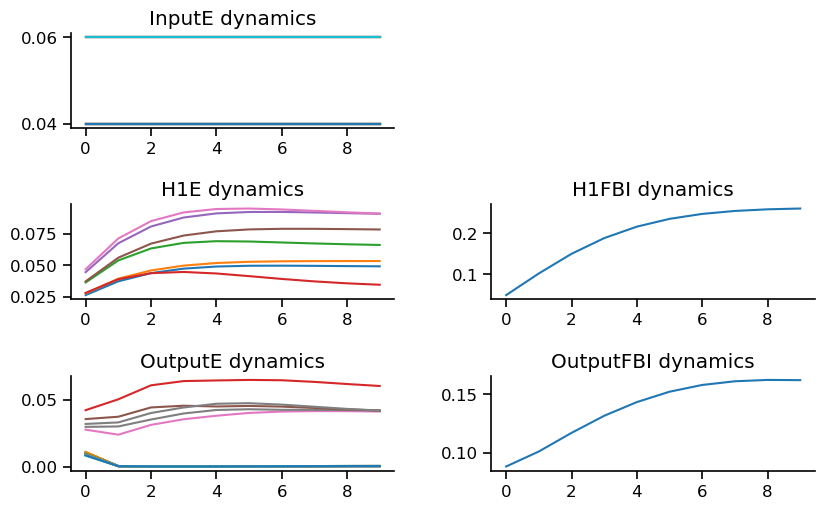

In [15]:
pt.plot_network_dynamics(bp_network)

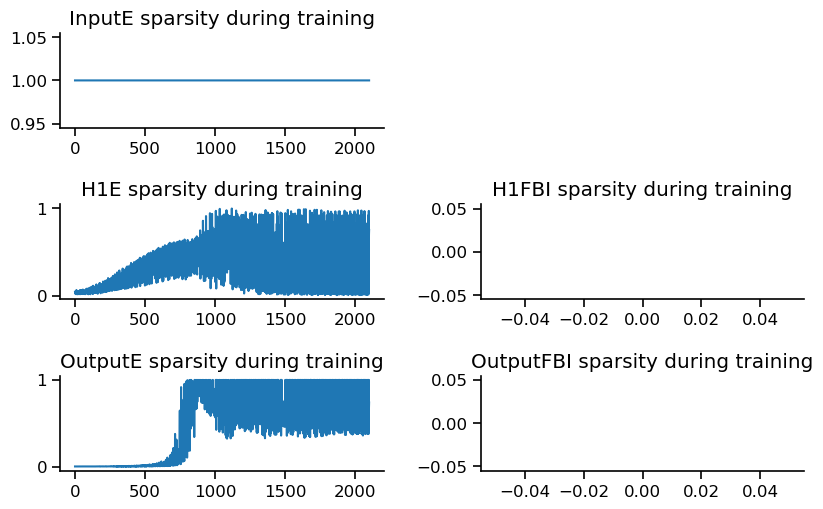

In [22]:
ut.compute_sparsity_history(bp_network)
pt.plot_sparsity_history(bp_network)

/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:106: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:145: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:177: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


population biases:
H1 E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.])
H1 FBI Parameter containing:
tensor([0.])
Output E Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Output FBI Parameter containing:
tensor([0.])


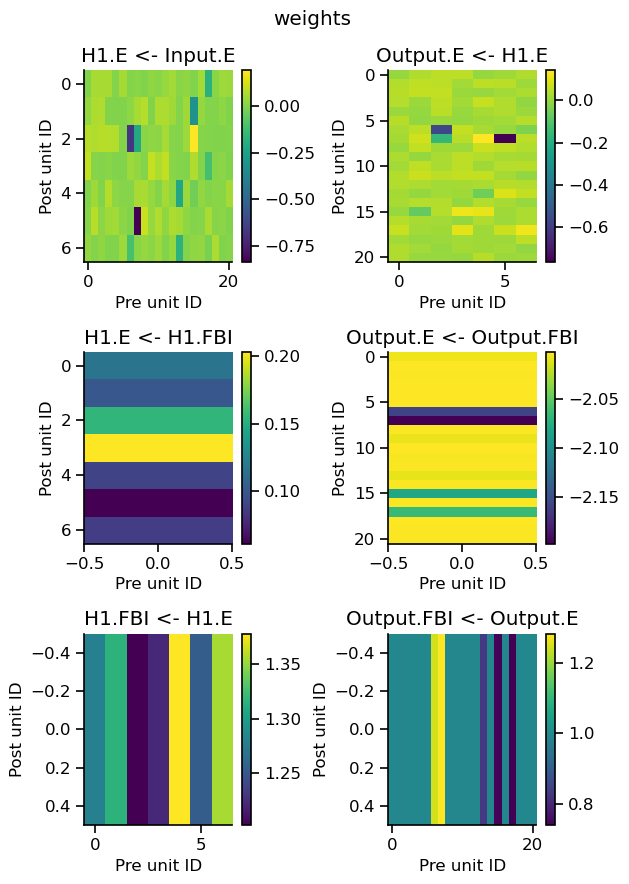

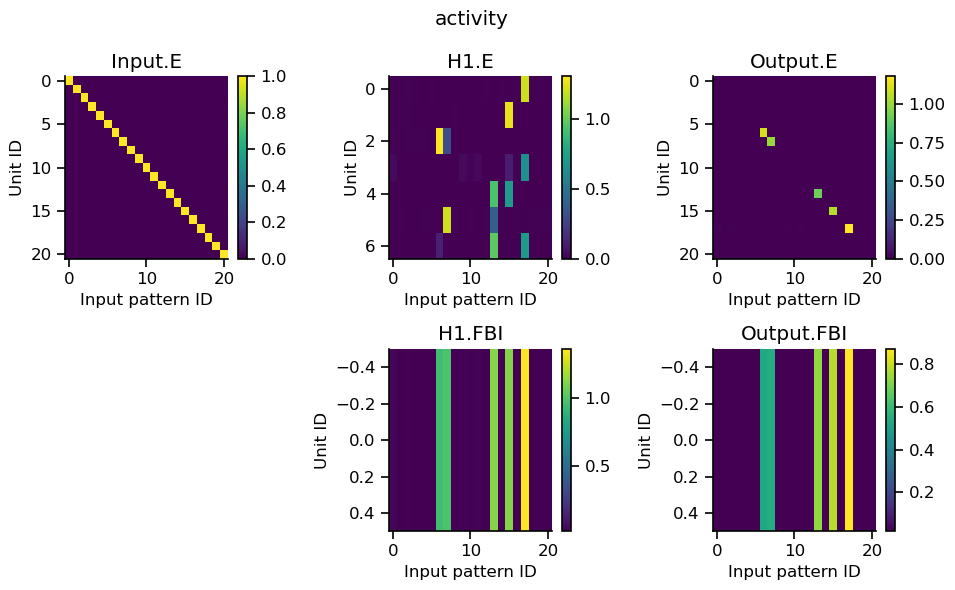

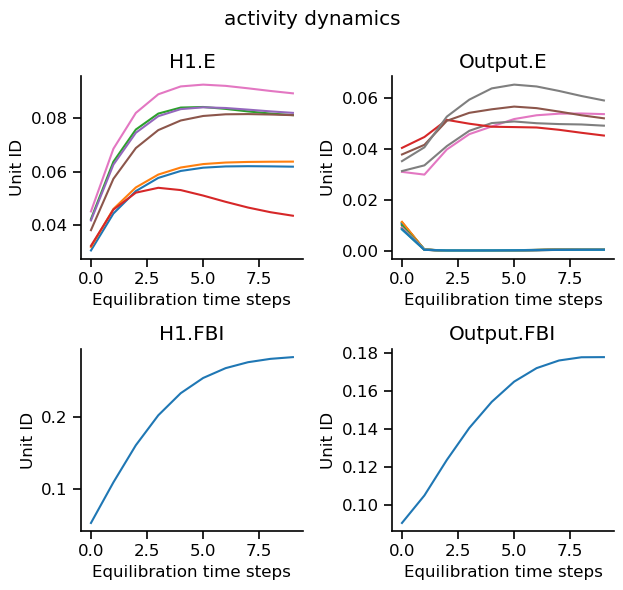

In [17]:
pt.plot_simple_EIANN_config_summary(bp_network, len(dataset))

## Combined loss landscape


In [18]:
bp_dict_keys = bp_network.state_dict().keys()
for i,state_dict in enumerate(btsp_network.param_history):
    state_dict_subset = {key: state_dict[key] for key in bp_dict_keys}
    btsp_network.param_history[i] = state_dict_subset

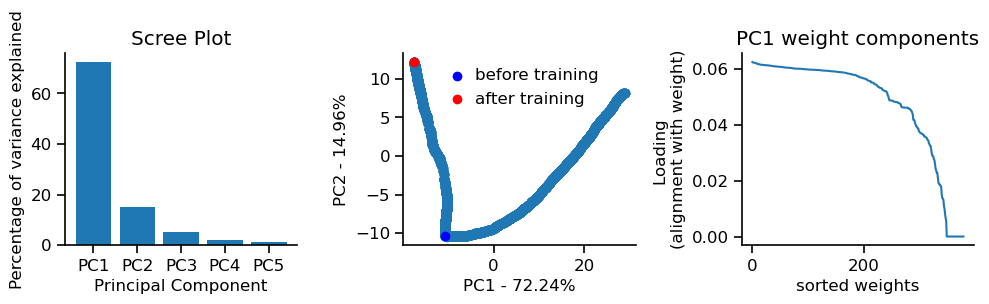

In [19]:
flat_param_history1,_ = pt.get_flat_param_history(btsp_network.param_history)
flat_param_history2,_ = pt.get_flat_param_history(bp_network.param_history)
combined_param_history = torch.cat([flat_param_history1,flat_param_history2])
pt.plot_param_history_PCs(combined_param_history)

  0%|          | 0/1600 [00:00<?, ?it/s]

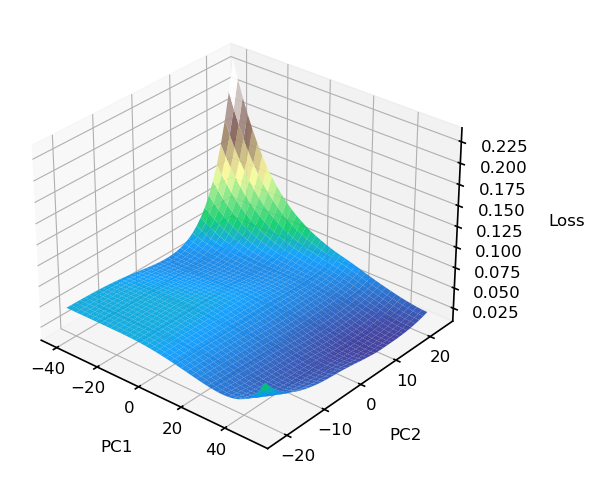

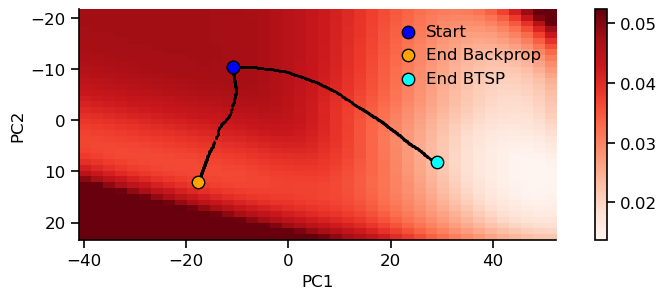

In [20]:
btsp_network.name = 'BTSP'
bp_network.name = 'Backprop'
pt.plot_loss_landscape(test_dataloader, bp_network, btsp_network, num_points=40, extension=0.5)